# Setup and Context

## Introduction to the Space Race

Dataset from <a href='nextspaceflight.com'>nextspaceflight.com</a> that includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957! It has data on the mission status (success/failure), the cost of the mission, the number of launches per country, and much much more. There's so much we can learn from this dataset about the dominant organisations and the trends over time.

<img src='https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2019/06/europe_s_rockets/19421217-6-eng-GB/Europe_s_rockets_pillars.jpg'>

## Questions to be answered:

>Who launched the most missions in any given year?


>Which months are the most popular for launches?

>Have space missions gotten safer or has the chance of failure remained unchanged?

>Where do most launches happen?

>Which company have occupied these locations?

>What is the current status of most rockets? 

In [37]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [38]:
data = pd.read_csv("P:/School/Coding Courses/Python Journey/Day 97 - Space Race Data Science/Space_Corrected.csv")

In [39]:
data.shape # 4324 rows and 9 columns

(4324, 9)

In [40]:
data.head() # First 5 rows of the dataset

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [41]:
data.tail() # Last 5 rows of the dataset

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [42]:
data.info() # Prints information about a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


### Who launched the most missions in any given year?

In [43]:
# Converting the Datum column into Datetime
data.Datum = pd.to_datetime(data.Datum, utc=True)

# Creating new column with year of lauch
data['Year'] = data.Datum.dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0.1    4324 non-null   int64              
 1   Unnamed: 0      4324 non-null   int64              
 2   Company Name    4324 non-null   object             
 3   Location        4324 non-null   object             
 4   Datum           4324 non-null   datetime64[ns, UTC]
 5   Detail          4324 non-null   object             
 6   Status Rocket   4324 non-null   object             
 7    Rocket         964 non-null    object             
 8   Status Mission  4324 non-null   object             
 9   Year            4324 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 337.9+ KB


In [44]:
company_launches = data.groupby(['Company Name','Year']).agg({'Company Name':pd.Series.count})
company_launches.rename(columns={'Company Name':'Company Name', 'Year':'Year', 'Company Name':'Launches'}, inplace=True)
company_launches[company_launches.Launches == company_launches.Launches.max()]

,,Launches
Company Name,Year,
RVSN USSR,1977,97


**The RSVN USSR** in **1997** launched **97** missions which the most missions launched in any year.

### Which months are the most popular for launches?

In [45]:
# Duplicating the dataframe so as not to tamper with the original
df_copy = data.copy()

# Creating new column with month of lauch
df_copy['Month'] = df_copy.Datum.dt.month_name()

In [46]:
month_launches = df_copy.groupby('Month').agg({'Month':pd.Series.count})
month_launches.rename(columns={'Month':'Month','Month':'Launches'}, inplace=True)
month_launches[month_launches.Launches == month_launches.Launches.max()]

,Launches
Month,
December,450


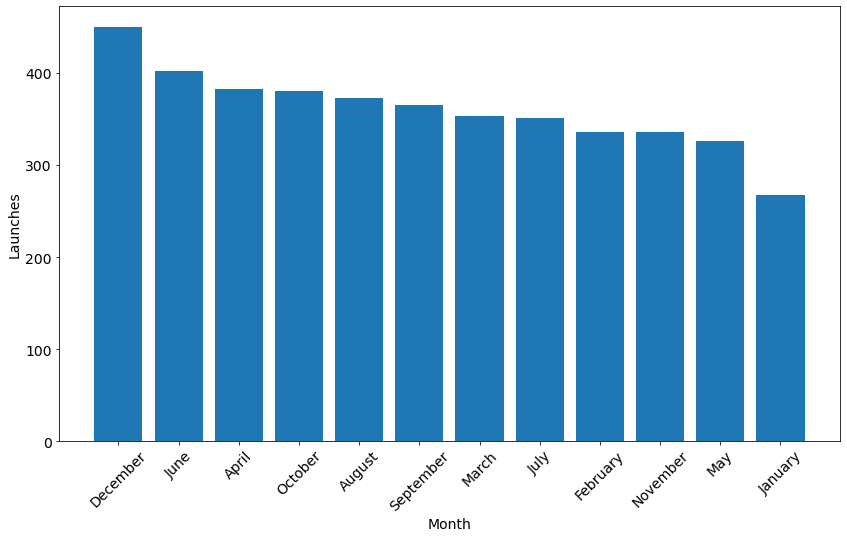

In [80]:
# Sorting the series in descending order
month_launches.sort_values('Launches', ascending=False, inplace=True)

plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Launches', fontsize=14)
plt.xlabel('Month', fontsize=14)

plt.bar(month_launches.index, month_launches.Launches)

plt.show()

The month of **December** appears to be the most popular month for launches with **450** launches as per 2020.

### Have space missions gotten safer or has the chance of failure remained unchanged?

In [47]:
df_safevfail = data.groupby(['Status Mission','Year']).agg({'Status Mission':pd.Series.count})
df_safevfail.rename(columns={'Status Mission':'Status Mission','Year':'Year','Status Mission':'Launches'}, inplace=True)
df_safevfail

Launches
Status Mission Year          
Failure        1957         1
               1958        20
               1959         9
               1960        20
               1961        17
...                       ...
Success        2016        86
               2017        84
               2018       113
               2019       100
               2020        57

[178 rows x 1 columns]

In [48]:
df_new = pd.DataFrame({'Status Mission':df_safevfail.index.get_level_values(0), # Getting first column values of an MultiIndex column 
                               'Year':df_safevfail.index.get_level_values(1),
                               'Launches':df_safevfail.Launches})

# Drops the index
df_new.reset_index(drop=True, inplace=True)

In [49]:
# Splitting the dataframe into series of Successful and Failed Launches
successful_launches = df_new[df_new['Status Mission'] == 'Success']
failed_launches = df_new[df_new['Status Mission'] == 'Failure']

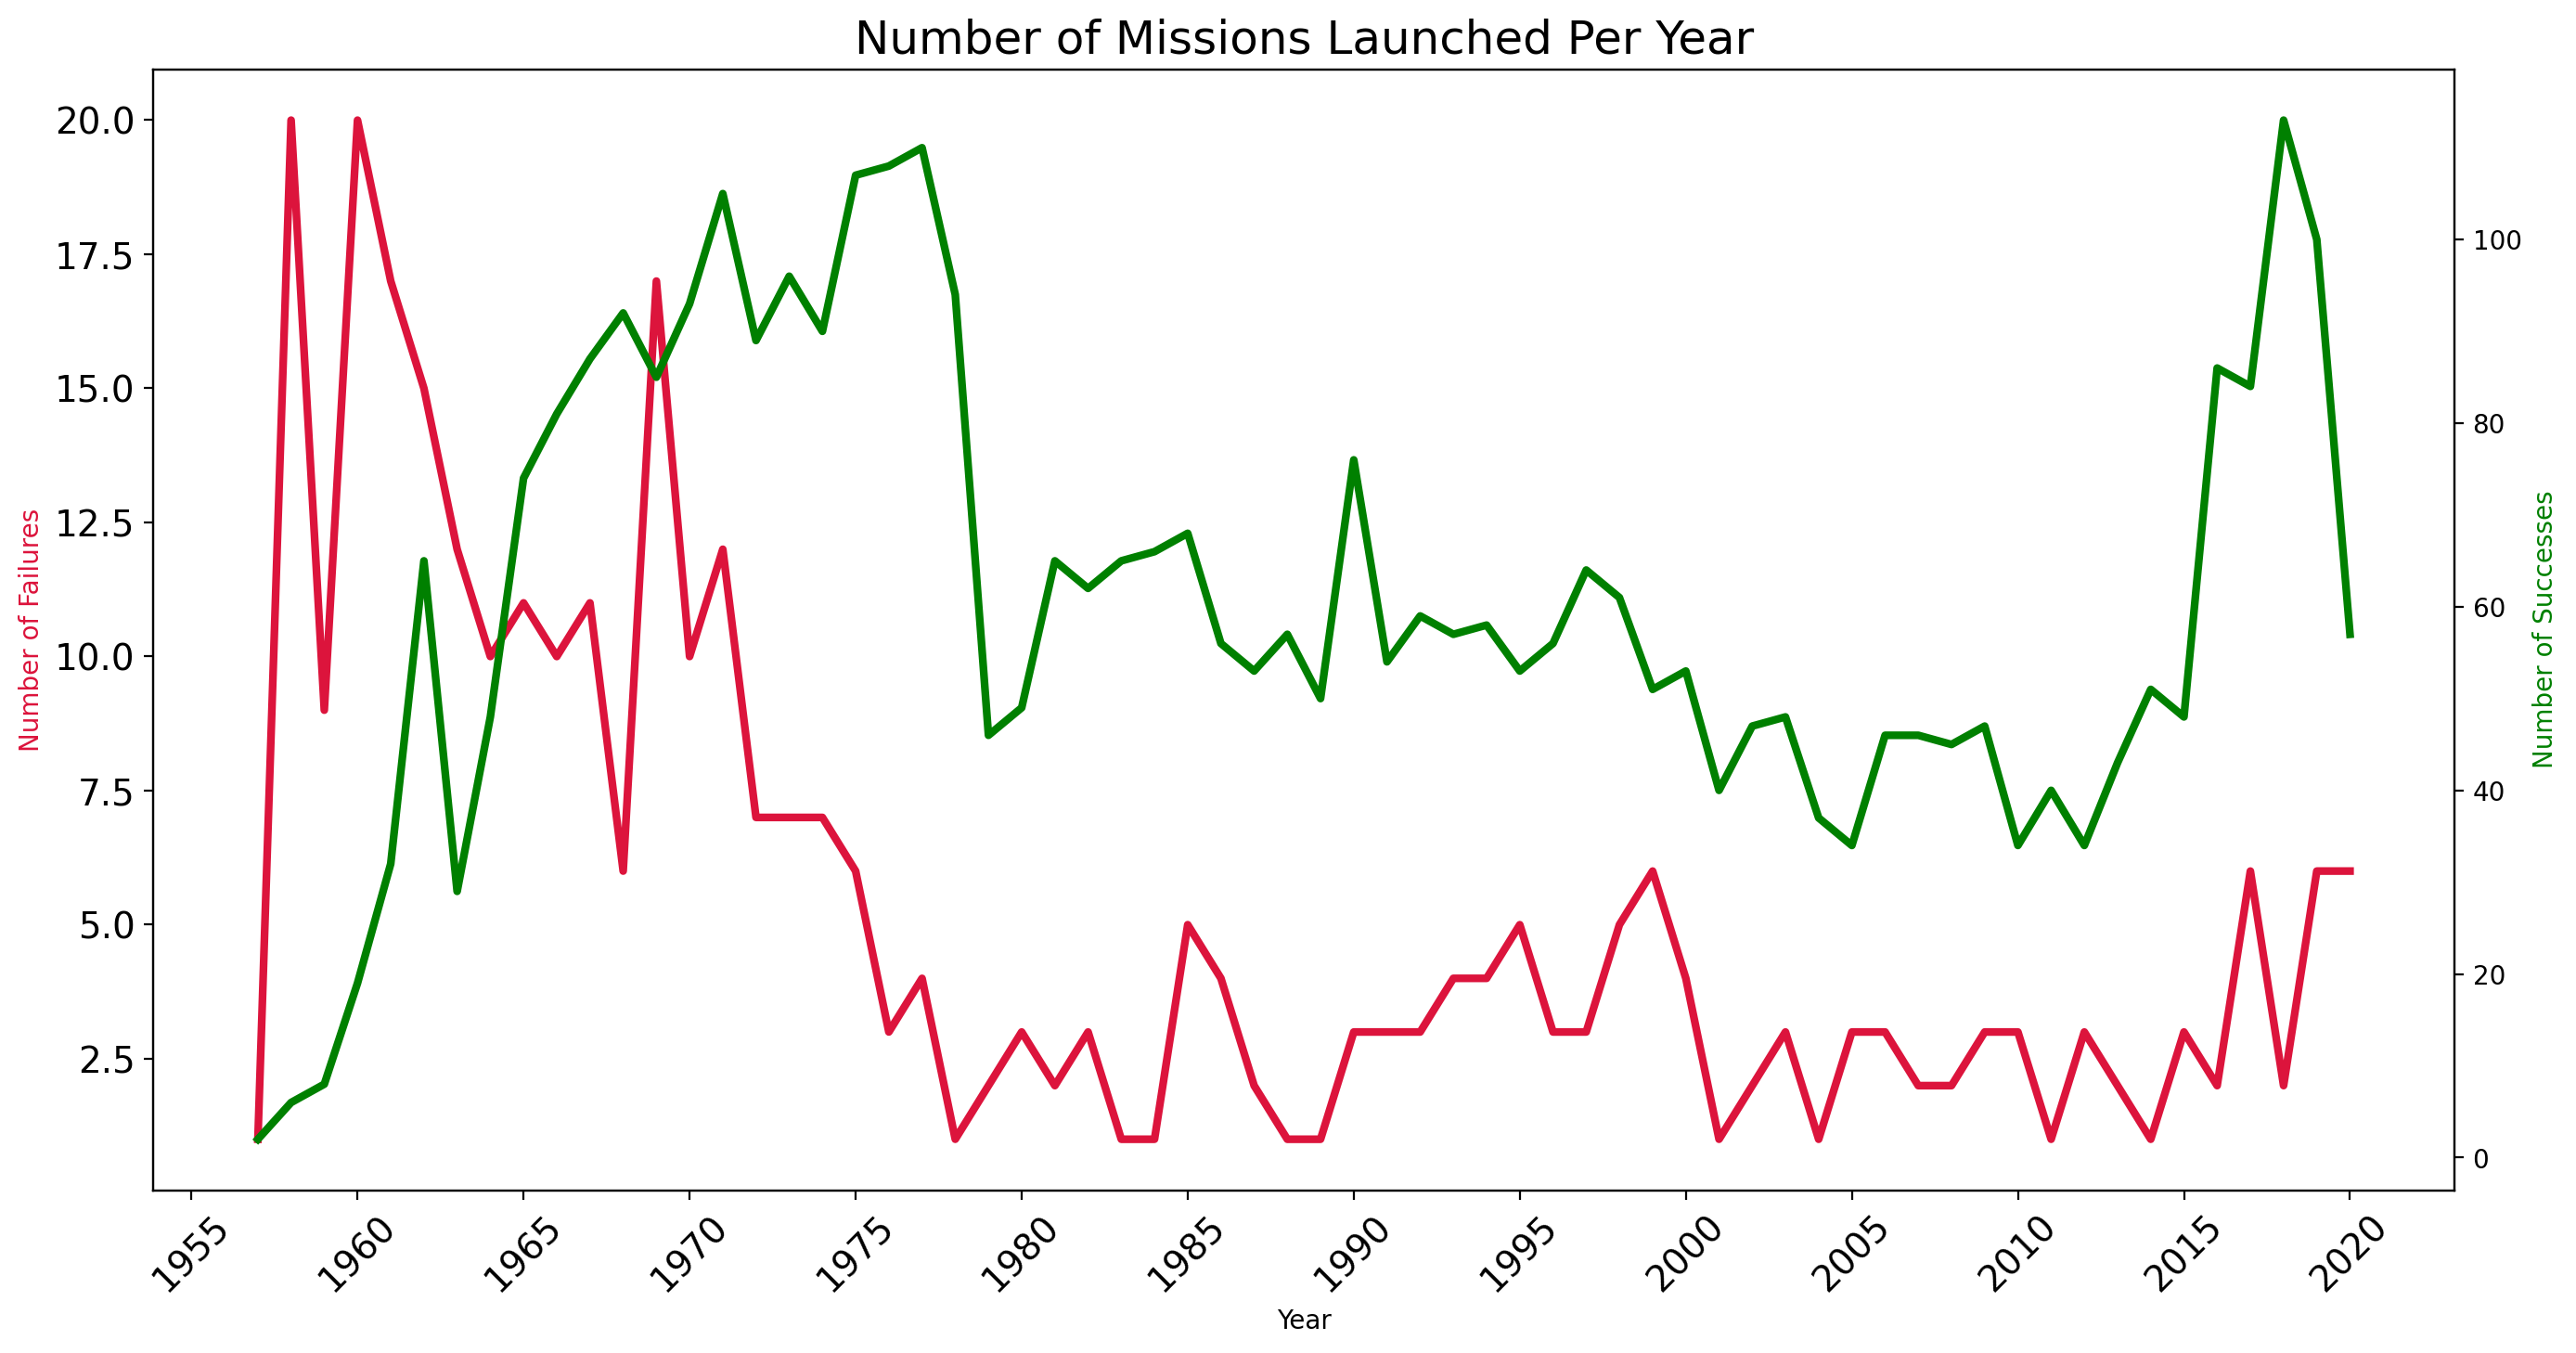

In [50]:
# Using Matplotlib superimpose the rolling average on a scatter plot
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Missions Launched Per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), #To create 5-year tick marks on the x-axis, we generate an array using NumPy:
           fontsize=14, 
           rotation=45)


ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

# The key thing is that by using the .twinx() 
# method allows ax1 and ax2 to share the same x-axis.

ax1.plot(failed_launches.Year, 
         failed_launches.Launches, 
         c='crimson',
         linewidth=3)

ax2.plot(successful_launches.Year, 
         successful_launches.Launches,
         c='green',
         linewidth=3)

#Add styling
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Failures', c='crimson')
ax2.set_ylabel('Number of Successes', c='green')

plt.show()

As we can see space missions have gotten safer over the years as the number of space missions increase and the designs of the rockets get better.

### Where do most launches happen?

In [51]:
location_launches = data.groupby('Location').agg({'Location':pd.Series.count})

# Renaming the columns
location_launches.rename(columns={'Location':'Location','Location':'Launches'}, inplace=True)

# Sorting in descending order
location_launches.sort_values('Launches', ascending=False, inplace=True)

In [52]:
# Top 5 locations with the most launches
location_launches.head()

,Launches
Location,
"Site 31/6, Baikonur Cosmodrome, Kazakhstan",235
"Site 132/1, Plesetsk Cosmodrome, Russia",216
"Site 43/4, Plesetsk Cosmodrome, Russia",202
"Site 41/1, Plesetsk Cosmodrome, Russia",198
"Site 1/5, Baikonur Cosmodrome, Kazakhstan",193


In [53]:
# Bottom 5 locations with the most launches
location_launches.tail()

,Launches
Location,
"K-84 Submarine, Barents Sea Launch Area, Barents Sea",1
"Site 131/29, Baikonur Cosmodrome, Kazakhstan",1
"LC-576A1, Vandenberg AFB, California, USA",1
"LC-11, Cape Canaveral AFS, Florida, USA",1
"Xichang Satellite Launch Center, China",1


### Which company have occupied these locations?

In [59]:
company_location_launches = data.groupby(['Company Name','Location']).agg({'Location':pd.Series.count})

# Renaming the columns
company_location_launches.rename(columns={'Company Name':'Company Name','Location':'Location','Location':'Launches'}, inplace=True)

# Sorting in descending order
company_location_launches.sort_values('Launches', ascending=False, inplace=True)
company_location_launches.head()

Launches
Company Name Location                                            
RVSN USSR    Site 31/6, Baikonur Cosmodrome, Kazakhstan       212
             Site 41/1, Plesetsk Cosmodrome, Russia           198
             Site 132/2, Plesetsk Cosmodrome, Russia          174
             Site 1/5, Baikonur Cosmodrome, Kazakhstan        174
             Site 43/4, Plesetsk Cosmodrome, Russia           171

In [61]:
df_new = pd.DataFrame({'Company Name':company_location_launches.index.get_level_values(0), # Getting first column values of an MultiIndex column 
                               'Location':company_location_launches.index.get_level_values(1),
                               'Launches':company_location_launches.Launches})

# Drops the index
df_new.reset_index(drop=True, inplace=True)

In [68]:
burst = px.sunburst(df_new, 
                    path=['Company Name', 'Location'], 
                    values='Launches',
                    title='Which companies launch most missions and where?',
                   )
 
burst.update_layout(coloraxis_showscale=False)
 
burst.show()

C:\tools\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\tools\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### What is the current status of most rockets?

In [70]:
status_rocket = data.groupby('Status Rocket').agg({'Status Rocket':pd.Series.count})
status_rocket.rename(columns={'Status Rocket':'Status Rocket','Status Rocket':'Count'})

,Count
Status Rocket,
StatusActive,790
StatusRetired,3534


According to the data we can see that there are more Retired rockets over the Active rockets.